Frame the Problem:
1.	Why is it important to frame the problem before looking at the data?



2.	The problem as stated by Kaggle due to this being a competition problem: 

	The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (i.e., name, age, gender, socio-economic class, etc).

Question: what type of problem is this? 


Get the Data:
3.	You can download it from Moodle. It is already broken up into training and test.


	
Explore the Data: 
Here is some information about the data provided by Kaggle: 
 

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

4.	What are the column headings? 


Knowing the type of data we’re dealing with can help us choose appropriate visualizations as well as know how we might need to manipulate (transform) the data. 

5.	Which features are categorical, and of those that are categorical, what type of category are they (nominal, ordinal, ratio, or interval based)? 



6.	Which features are numerical? Are they discrete, continuous, or timeseries based?



7.	Preview the first five rows of the data. Preview the last five rows of the data. What do you observe about the data? 





8.	Are any features missing data? Are there null values? If so, which features? 




9.	Describe the data both numerical and string (hint: describe(include=[‘0’]) allows strings to be described statistically ). 



Next steps…based on what we have learned so far, we may want to know how well each feature correlates with Survival. We need to clean some data. This means, we may want to complete some missing values if we feel the feature is important, correct others, which may mean dropping the feature entirely. We may want to create new features to simplify the data. 

10.	Be pivoting features against each other, we can quickly measure correlation. Example: train_df[[‘Sex’,’Survived’]].groupby([‘Sex’], as_index=False).mean().sort_values(by=’Survived’,ascending=False)
	
	Grab a partner and determine which features you should try and explain the 
results. 




11.	Try a histogram to look at age. A histogram is useful for analyzing continuous numerical variables where banding or ranges will help identify useful patterns. 
	g = sns.FacetGrid(train_df, col='Survived') 
	g.map(plt.hist, 'Age', bins=20)

	What do the results demonstrate? 


12.	Do the same as #11 but use Pclass and Age. You’ll need to add a row to the FacetGrid for Pclass. Suggested: add size = 2.2 and aspect = 1.6. In the grid.map add alpha =.5. Add a legend to the grid. 
	
	What do the results demonstrate?

13.	What about categorical features? We can use a point plot to look at survival by class and sex. Point plots are good for focusing comparisons between different levels of one or more categorical variables. They are very good for looking at interactions. For example, they can show how the relationship between levels of one categorical variable changes across levels of a second categorical value.  
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6) 
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep') 
grid.add_legend()

	What do the results demonstrate? 


14.	Let’s take a look at fare and see how it correlates with embarked, sex, and survival.
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6) 
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None) 
grid.add_legend()
Prepare the Data:
15.	We likely need to drop a few features…What are two that you think we should drop? 


16.	Can we salvage anything from Name? Replace rare names with Rare, Mlle, Ms to Miss, and Mme to Mrs. Then do a groupby to see what the results look like. 



17.	Convert categorical titles to ordinal. 



In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
train_df = pd.read_csv('../csv_files/train.csv')  
test_df = pd.read_csv('../csv_files/test.csv')  

Get column names(two ways)

In [13]:
train_df.head(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [14]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


5- Categorical

Ordinal: PassengerID (may not be relevant), Pclass, Ticket (may not be relevant)
Nominal: Embarked, Sex, Cabin, Survived

6- Numerical

Discrete: SibSp,Parch
Contunious: Age,Fare

7

In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [19]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Smith, Mr. James Clinch",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [38]:
train_df[['Embarked','Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Pclass',ascending=False)

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


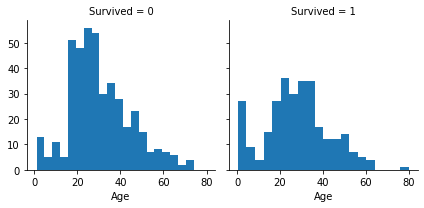

In [18]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

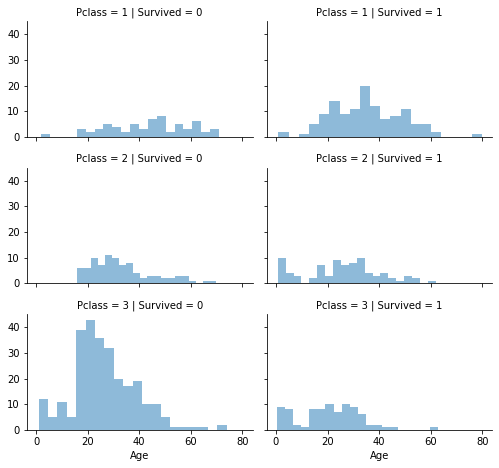

In [20]:
g = sns.FacetGrid(train_df, row='Pclass', col='Survived', height=2.2, aspect=1.6)
g.map(plt.hist, 'Age', bins=20, alpha=.5)

C:\Python39\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Python39\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


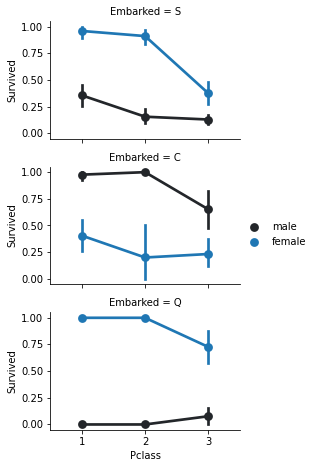

In [24]:
g = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
g.map(sns.pointplot, 'Pclass','Survived', 'Sex', pallette='deep')
g.add_legend()

C:\Python39\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


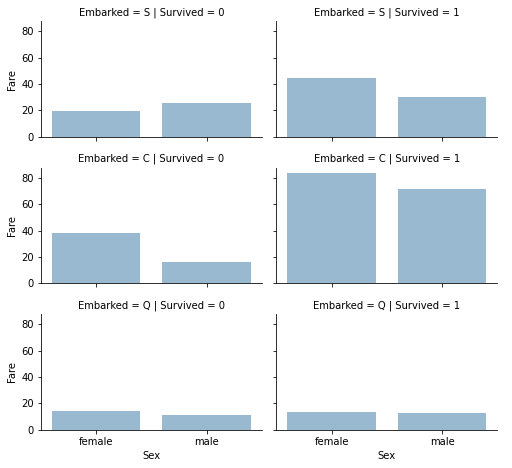

In [26]:
g = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
g.map(sns.barplot, 'Sex','Fare', alpha=.5, ci=None)
g.add_legend()

In [38]:
combine = [train_df, test_df]

In [41]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)/.',expand=False)
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,male
Title,
Carl,1


In [40]:
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,male
Title,
Carl,1


In [43]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkeer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')

In [49]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3,'Master': 4, 'Rare': 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [47]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0.0


In [50]:
title_mapping = {'Male':1, 'Female':2}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(title_mapping)
    dataset['Sex'] = dataset['Sex'].fillna(0)

In [51]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0.0,22.0,1,0,7.2500,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,71.2833,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,53.1000,S,0.0
4,5,0,3,"Allen, Mr. William Henry",0.0,35.0,0,0,8.0500,S,0.0


In [58]:
guess_ages = np.zeros((2, 3))
for dataset in combine:
    for i in range(2):
        for j in range(3):
            guess_df = dataset[(dataset['Sex']==i)&(dataset['Pclass']==j+1)]['Age'].dropna()
            guess_ages[i,j] = guess_df.median()
    for i in range(2):
        for i in range(3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex ==i) & dataset.Pclass==j+1, 'Age'] = guess_ages[i,j]

IndexError: index 2 is out of bounds for axis 0 with size 2